In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
"""
DATA

playlist used: https://open.spotify.com/playlist/54nv8jbrm4JoHEZ49Qvjgl?si=e62b561e3b084058
songs: 9964 songs
total playtime: 622hrs 1min
"""

'\nDATA\n\nplaylist used: https://open.spotify.com/playlist/54nv8jbrm4JoHEZ49Qvjgl?si=e62b561e3b084058\nsongs: 9964 songs\ntotal playtime: 622hrs 1min\n'

In [72]:
data = pd.read_csv('data.csv')
print(data.head(2))

   Unnamed: 0        name                                              album  \
0           0    Firework  Katy Perry - Teenage Dream: The Complete Confe...   
1           1  All We Are                                  Dreaming Out Loud   

        artist release_date  duration_ms  popularity  acousticness  \
0   Katy Perry   2012-03-12       227880          74        0.1390   
1  OneRepublic   2007-01-01       266226          40        0.0966   

   danceability  energy  key  mode  instrumentalness  liveness  loudness  \
0         0.638   0.826    8     1          0.000000    0.0803    -4.968   
1         0.397   0.817    2     1          0.000008    0.3160    -5.495   

   speechiness  valence    tempo  time_signature  \
0       0.0479    0.649  124.072               4   
1       0.0420    0.416  158.004               4   

                                              genres  
0              ['dance pop', 'pop', 'post-teen pop']  
1  ['dance pop', 'neo mellow', 'piano rock', 'pop...

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9943 non-null   int64  
 1   name              9943 non-null   object 
 2   album             9943 non-null   object 
 3   artist            9943 non-null   object 
 4   release_date      9943 non-null   object 
 5   duration_ms       9943 non-null   int64  
 6   popularity        9943 non-null   int64  
 7   acousticness      9943 non-null   float64
 8   danceability      9943 non-null   float64
 9   energy            9943 non-null   float64
 10  key               9943 non-null   int64  
 11  mode              9943 non-null   int64  
 12  instrumentalness  9943 non-null   float64
 13  liveness          9943 non-null   float64
 14  loudness          9943 non-null   float64
 15  speechiness       9943 non-null   float64
 16  valence           9943 non-null   float64


In [73]:
#Change dtype of 'genres' (str -> list)
import ast
for i in range(len(data)):
    data['genres'][i] = ast.literal_eval(data['genres'][i])

<ipython-input-73-15705282fa49>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
data.iloc[0]['genres']

['dance pop', 'pop', 'post-teen pop']

## Genre Analysis

<h3> Build Genre DataFrame </h3>

In [75]:
genre_list = []
for i in range(len(data)):
    for g in data.iloc[i]['genres']:
        genre_list.append(g)

In [76]:
genre_list
len(genre_list)

39365

In [77]:
from collections import Counter
genre_dist = Counter(genre_list)
ordered_g = dict(genre_dist.most_common())

In [78]:
ordered_g

{'pop': 2433,
 'dance pop': 1622,
 'modern rock': 1382,
 'pop rock': 1336,
 'rock': 1262,
 'electropop': 995,
 'indie poptimism': 798,
 'post-teen pop': 702,
 'tropical house': 600,
 'edm': 597,
 'neo mellow': 583,
 'indie pop': 567,
 'pop rap': 560,
 'pop dance': 527,
 'stomp and holler': 526,
 'indie rock': 511,
 'permanent wave': 424,
 'alternative rock': 420,
 'classic rock': 413,
 'mellow gold': 405,
 'electro house': 338,
 'soft rock': 337,
 'alternative dance': 335,
 'indietronica': 324,
 'metropopolis': 321,
 'uk pop': 299,
 'indie folk': 298,
 'vapor soul': 290,
 'alt z': 284,
 'shimmer pop': 267,
 'viral pop': 261,
 'alternative metal': 261,
 'rap': 260,
 'album rock': 257,
 'pop punk': 256,
 'r&b': 243,
 'new wave pop': 231,
 'hip hop': 229,
 'art pop': 226,
 'pop edm': 204,
 'new rave': 195,
 'canadian pop': 190,
 'piano rock': 188,
 'urban contemporary': 184,
 'singer-songwriter': 179,
 'modern alternative rock': 176,
 'new americana': 175,
 'post-grunge': 171,
 'neo soul'

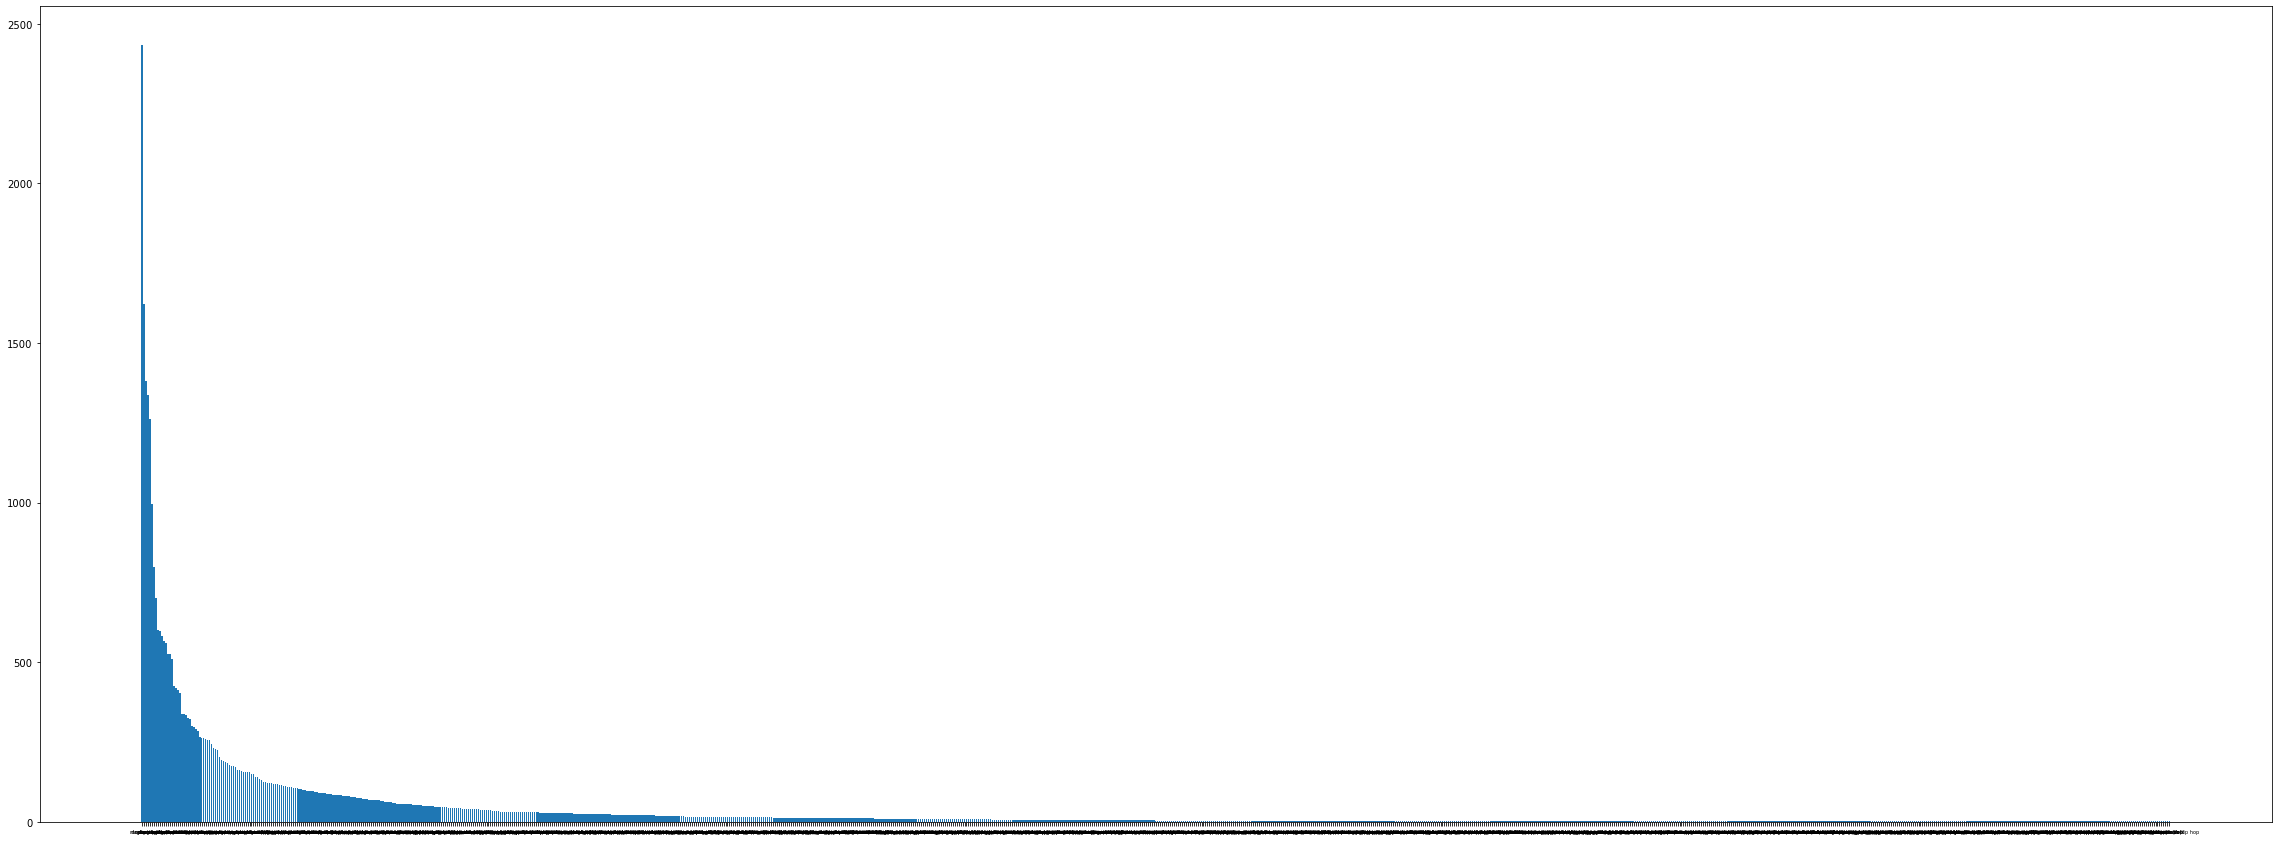

In [79]:
keys = ordered_g.keys()
values = ordered_g.values()
plt.figure(figsize=(40,15))
plt.bar(keys, values)
plt.xticks(fontsize=5)
plt.show()

In [80]:
genre_dict = {}
for k in ordered_g.keys():
    genre_dict[k] = [None]*4 + [0]*14

In [81]:
#genre_dict

In [82]:
for g in ordered_g.keys():
    song_list = []
    album_list = []
    artist_list = []
    date_list = []
    for i in range(len(data)):
        if g in data['genres'][i]:
            song_list.append(data['name'][i])
            album_list.append(data['album'][i])
            artist_list.append(data['artist'][i])
            date_list.append(data['release_date'][i])
            genre_dict[g][4] += data['duration_ms'][i]
            genre_dict[g][5] += data['popularity'][i]
            genre_dict[g][6] += data['acousticness'][i]
            genre_dict[g][7] += data['danceability'][i]
            genre_dict[g][8] += data['energy'][i]
            genre_dict[g][9] += data['key'][i]
            genre_dict[g][10] += data['mode'][i]
            genre_dict[g][11] += data['instrumentalness'][i]
            genre_dict[g][12] += data['liveness'][i]
            genre_dict[g][13] += data['loudness'][i]
            genre_dict[g][14] += data['speechiness'][i]
            genre_dict[g][15] += data['valence'][i]
            genre_dict[g][16] += data['tempo'][i]
            genre_dict[g][17] += data['time_signature'][i]    
    genre_dict[g][0] = song_list
    genre_dict[g][1] = album_list
    genre_dict[g][2] = artist_list
    genre_dict[g][3] = date_list
    genre_dict[g][4] = genre_dict[g][4]/len(song_list)
    genre_dict[g][5] = genre_dict[g][5]/len(song_list)
    genre_dict[g][6] = genre_dict[g][6]/len(song_list)
    genre_dict[g][7] = genre_dict[g][7]/len(song_list)
    genre_dict[g][8] = genre_dict[g][8]/len(song_list)
    genre_dict[g][9] = genre_dict[g][9]/len(song_list)
    genre_dict[g][10] = genre_dict[g][10]/len(song_list)
    genre_dict[g][11] = genre_dict[g][11]/len(song_list)
    genre_dict[g][12] = genre_dict[g][12]/len(song_list)
    genre_dict[g][13] = genre_dict[g][13]/len(song_list)
    genre_dict[g][14] = genre_dict[g][14]/len(song_list)
    genre_dict[g][15] = genre_dict[g][15]/len(song_list)
    genre_dict[g][16] = genre_dict[g][16]/len(song_list)
    genre_dict[g][17] = genre_dict[g][17]/len(song_list)

In [83]:
genre_dict['melodic hardcore']

[['Fuck Authority', 'Disconnected', 'Lookers', 'Submission'],
 ['Land Of The Free?',
  "Don't Turn Away",
  'Lookers',
  'Promise Everything (Deluxe)'],
 ['Pennywise', 'Face To Face', 'The Menzingers', 'Basement'],
 ['2001-06-19', '1992', '2016-08-15', '2017-03-03'],
 190831.75,
 35.75,
 0.007999160000000002,
 0.43674999999999997,
 0.9405,
 6.25,
 0.75,
 0.0207442525,
 0.27349999999999997,
 -4.94925,
 0.051925,
 0.6185,
 147.925,
 4.0]

In [84]:
g_df = pd.DataFrame(genre_dict.values(),columns=['name','album','artist','release_date','duration_ms','popularity','acousticness','danceability','energy','key','mode','instrumentalness',
                                       'liveness','loudness','speechiness','valence','tempo','time_signature'])

In [85]:
g_df.insert(0,'genre',genre_dict.keys())

In [86]:
g_df
#for artist and album, change to dict so that we can keep track of the number of times the artist appears as values
#change release_date to date

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
0,pop,"[Firework, All We Are, The Man Who Can't Be Mo...",[Katy Perry - Teenage Dream: The Complete Conf...,"[Katy Perry, OneRepublic, The Script, Adele, B...","[2012-03-12, 2007-01-01, 2008-09-08, 2011-01-1...",221169.662557,36.899712,0.224531,0.608730,0.655389,5.262639,0.618989,0.010801,0.172097,-6.136536,0.071526,0.460302,119.035097,3.956021
1,dance pop,"[Firework, All We Are, The Man Who Can't Be Mo...",[Katy Perry - Teenage Dream: The Complete Conf...,"[Katy Perry, OneRepublic, The Script, Bruno Ma...","[2012-03-12, 2007-01-01, 2008-09-08, 2010-10-0...",219288.027744,36.165845,0.156376,0.635585,0.707515,5.268804,0.606042,0.011563,0.180577,-5.587928,0.075109,0.508910,119.888498,3.966091
2,modern rock,"[Uma Thurman, Geronimo, Riptide, Centuries, Ho...","[American Beauty/American Psycho, Geronimo, Dr...","[Fall Out Boy, Sheppard, Vance Joy, Fall Out B...","[2015-01-20, 2014-01-01, 2014-09-09, 2015-01-2...",227263.874096,30.399421,0.131592,0.537485,0.741009,5.172938,0.702605,0.043930,0.205439,-5.942999,0.057754,0.468897,123.300159,3.952243
3,pop rock,"[All We Are, The Man Who Can't Be Moved, the l...","[Dreaming Out Loud, The Script, lovestrong., L...","[OneRepublic, The Script, Christina Perri, Sar...","[2007-01-01, 2008-09-08, 2011-05-10, 2007-07-0...",226682.422156,33.172156,0.225931,0.552388,0.666092,5.162425,0.774701,0.016490,0.176313,-6.654748,0.049161,0.477218,119.505310,3.945359
4,rock,"[Uma Thurman, Centuries, Renegades, It Ain't O...","[American Beauty/American Psycho, American Bea...","[Fall Out Boy, Fall Out Boy, X Ambassadors, Le...","[2015-01-20, 2015-01-20, 2015-06-30, 2000, 200...",239514.401743,36.261490,0.138556,0.531861,0.728256,4.899366,0.744057,0.052086,0.199306,-6.997844,0.054044,0.540630,123.902221,3.957211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,k-indie,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000
1015,korean indie folk,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000
1016,korean r&b,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000
1017,bedroom soul,[Lucky],[Stereo],[Omar Apollo],[2018-05-30],162347.000000,35.000000,0.242000,0.726000,0.580000,11.000000,0.000000,0.035900,0.132000,-7.655000,0.054000,0.799000,112.919000,4.000000


<h3> Create Super-Genre </h3>

In [89]:
len(g_df)

1019

<h3> Clustering Analysis on Sampled Dataset </h3>

In [90]:
from sklearn.cluster import KMeans

In [91]:
X = g_df.loc[:,'duration_ms':]
X = X.set_index(g_df['genre'])
#X

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
#scaled_features

<h4> 1. Elbow method to find the ideal number of clusters </h4>

In [93]:
sse = []
k = range(1,50)
for K in k:
    km = KMeans(n_clusters=K)
    km = km.fit(scaled_features)
    sse.append(km.inertia_)

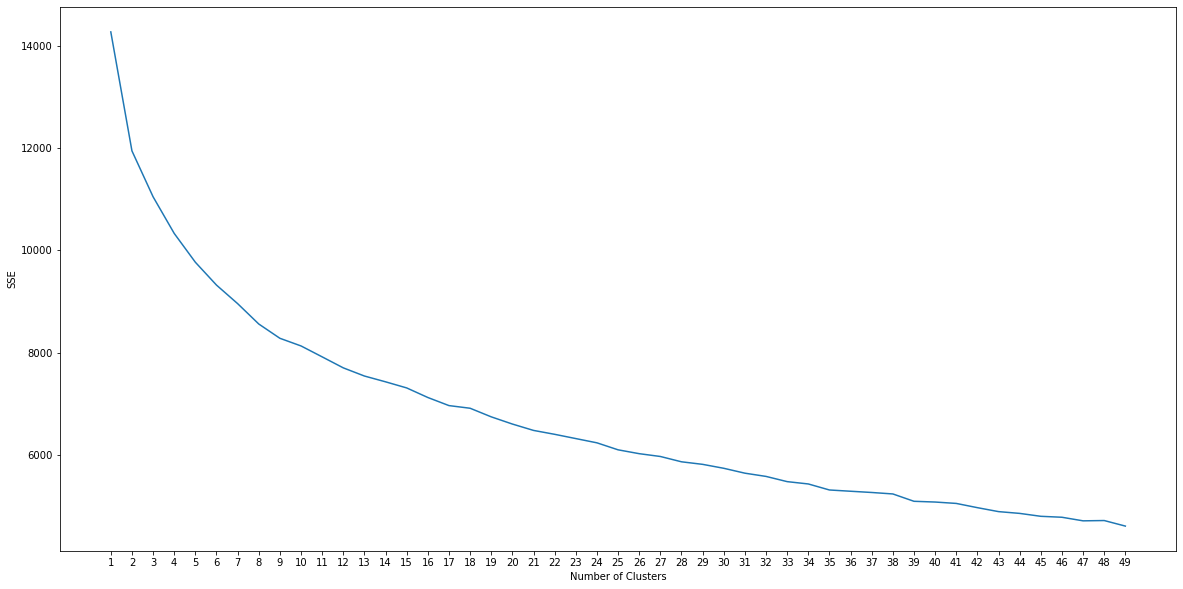

In [94]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 50), sse)
plt.xticks(range(1, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [95]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 50), sse, curve="convex", direction="decreasing"
    )

kl.elbow

12

From this method, 12 is an ideal number of clusters.  

<h3> K-Means Clustering (12 clusters) </h3>

In [96]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(scaled_features)
super_genre = kmeans.labels_

In [97]:
g_df['super_genre'] = super_genre

In [98]:
g_df

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,super_genre
0,pop,"[Firework, All We Are, The Man Who Can't Be Mo...",[Katy Perry - Teenage Dream: The Complete Conf...,"[Katy Perry, OneRepublic, The Script, Adele, B...","[2012-03-12, 2007-01-01, 2008-09-08, 2011-01-1...",221169.662557,36.899712,0.224531,0.608730,0.655389,5.262639,0.618989,0.010801,0.172097,-6.136536,0.071526,0.460302,119.035097,3.956021,6
1,dance pop,"[Firework, All We Are, The Man Who Can't Be Mo...",[Katy Perry - Teenage Dream: The Complete Conf...,"[Katy Perry, OneRepublic, The Script, Bruno Ma...","[2012-03-12, 2007-01-01, 2008-09-08, 2010-10-0...",219288.027744,36.165845,0.156376,0.635585,0.707515,5.268804,0.606042,0.011563,0.180577,-5.587928,0.075109,0.508910,119.888498,3.966091,6
2,modern rock,"[Uma Thurman, Geronimo, Riptide, Centuries, Ho...","[American Beauty/American Psycho, Geronimo, Dr...","[Fall Out Boy, Sheppard, Vance Joy, Fall Out B...","[2015-01-20, 2014-01-01, 2014-09-09, 2015-01-2...",227263.874096,30.399421,0.131592,0.537485,0.741009,5.172938,0.702605,0.043930,0.205439,-5.942999,0.057754,0.468897,123.300159,3.952243,6
3,pop rock,"[All We Are, The Man Who Can't Be Moved, the l...","[Dreaming Out Loud, The Script, lovestrong., L...","[OneRepublic, The Script, Christina Perri, Sar...","[2007-01-01, 2008-09-08, 2011-05-10, 2007-07-0...",226682.422156,33.172156,0.225931,0.552388,0.666092,5.162425,0.774701,0.016490,0.176313,-6.654748,0.049161,0.477218,119.505310,3.945359,6
4,rock,"[Uma Thurman, Centuries, Renegades, It Ain't O...","[American Beauty/American Psycho, American Bea...","[Fall Out Boy, Fall Out Boy, X Ambassadors, Le...","[2015-01-20, 2015-01-20, 2015-06-30, 2000, 200...",239514.401743,36.261490,0.138556,0.531861,0.728256,4.899366,0.744057,0.052086,0.199306,-6.997844,0.054044,0.540630,123.902221,3.957211,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,k-indie,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000,2
1015,korean indie folk,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000,2
1016,korean r&b,[Citizen Kane],[24 : How to find true love and happiness],[HYUKOH],[2018-05-31],206493.000000,0.000000,0.000612,0.303000,0.882000,2.000000,1.000000,0.001930,0.097700,-6.013000,0.145000,0.298000,98.153000,4.000000,2
1017,bedroom soul,[Lucky],[Stereo],[Omar Apollo],[2018-05-30],162347.000000,35.000000,0.242000,0.726000,0.580000,11.000000,0.000000,0.035900,0.132000,-7.655000,0.054000,0.799000,112.919000,4.000000,1


In [100]:
super_genre = {}
for i in range(0,12):
    g_list = []
    for j in range(len(g_df)):
        if g_df['super_genre'][j] == i:
            g_list.append(g_df['genre'][j])
    super_genre[i] = g_list

In [101]:
#in the order of frequency
super_genre

{0: ['canadian ccm',
  'anthem emo',
  'athens indie',
  'nwobhm',
  'northamptonshire indie',
  'christian punk',
  'psychedelic pop',
  'early us punk',
  'old school thrash',
  'thrash metal',
  'canadian country',
  'little rock indie',
  'melodipop',
  'classic dubstep',
  'banjo',
  'lithuanian pop',
  'classic belgian pop',
  'birmingham metal',
  'stoner rock',
  'uk doom metal',
  'new orleans rap',
  'rap inde',
  'deep dance pop',
  'sunnlensk tonlist',
  'iowa indie',
  'new orleans indie',
  'southern americana',
  'arkansas indie',
  'north east england indie',
  'san diego indie',
  'surf punk',
  'demoscene',
  'fort worth indie',
  'bc underground hip hop',
  'canadian old school hip hop',
  'trancecore',
  'rock alternatif francais',
  'atlanta metal',
  'progressive groove metal',
  'progressive sludge',
  'sludge metal',
  'stoner metal',
  'classic hardstyle',
  'euphoric hardstyle'],
 1: ['house',
  'uk dance',
  'miami hip hop',
  'danish pop',
  'hip house',
  '

In [124]:
#save as csv
g_df.to_csv("super_genre.csv", index=False)

In [152]:
g_df = pd.read_csv('super_genre.csv')

In [153]:
g_df.columns

Index(['genre', 'name', 'album', 'artist', 'release_date', 'duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy', 'key', 'mode',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'time_signature', 'super_genre'],
      dtype='object')

In [154]:
g_df.head(2)

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,super_genre
0,pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'A...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",221169.662557,36.899712,0.224531,0.608730,0.655389,5.262639,0.618989,0.010801,0.172097,-6.136536,0.071526,0.460302,119.035097,3.956021,6
1,dance pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'B...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",219288.027744,36.165845,0.156376,0.635585,0.707515,5.268804,0.606042,0.011563,0.180577,-5.587928,0.075109,0.508910,119.888498,3.966091,6


In [156]:
g_df_scaled = g_df
g_df_scaled.head(2)

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,super_genre
0,pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'A...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",221169.662557,36.899712,0.224531,0.608730,0.655389,5.262639,0.618989,0.010801,0.172097,-6.136536,0.071526,0.460302,119.035097,3.956021,6
1,dance pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'B...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",219288.027744,36.165845,0.156376,0.635585,0.707515,5.268804,0.606042,0.011563,0.180577,-5.587928,0.075109,0.508910,119.888498,3.966091,6


In [162]:
g_df_scaled[['duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy', 'key', 'mode',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'time_signature']]=scaled_features

In [164]:
g_df_scaled.head(2)

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,super_genre
0,pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'A...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",-0.115255,0.622408,-0.046669,0.221023,-0.028776,0.081218,-0.109565,-0.389960,-0.115209,0.379336,-0.057248,-0.202428,-0.131381,0.070971,6
1,dance pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'B...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",-0.164343,0.581920,-0.335696,0.421467,0.257826,0.083864,-0.150184,-0.386008,-0.017096,0.524002,0.009541,0.054038,-0.088384,0.114436,6


In [165]:
#save as csv
g_df_scaled.to_csv("super_genre_scaled.csv", index=False)